In [374]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import random

In [375]:
dataset = np.genfromtxt('data.csv', delimiter = ",")
random.shuffle(dataset)
split = int(0.8 * len(dataset))
train_data = dataset[:split]
test_data = dataset[split:]

In [376]:
def calculate_euclidean_distance(training_features, query_features):
    return np.sqrt(np.sum(np.square(query_features-training_features), axis=1))

In [377]:
def predict(train_data, test_data):
    k = 5
    distances = calculate_euclidean_distance(train_data[:, 0:-1], test_data[0:-1])
    
    indices = np.argsort(distances)
    predicted_value = np.mean(train_data[indices[0:k], -1])
    
    return predicted_value

In [378]:
def calculate_r2(actual_target_values, predicted_target_values):
    sum_squared_residuals = np.sum(np.square(predicted_target_values - actual_target_values))
    sum_squares = np.sum(np.square(np.mean(actual_target_values) - actual_target_values))
    
    r2 = 1 - (sum_squared_residuals / sum_squares)
    
    return r2

In [379]:
def count_errors(actual_target_values, predicted_target_values, threshold):
    errors = np.abs(predicted_target_values - actual_target_values) > threshold
    return np.sum(errors)

In [389]:
start_time = time.process_time()

predictions = []

for i in range(len(test_data)):
    predicted_value = predict(train_data, test_data[i])
    predictions.append(predicted_value)  

r2_score = calculate_r2(test_data[:, -1], np.array(predictions))
threshold = 0.01 
number_of_errors = count_errors(test_data[:, -1], predictions, threshold)

end_time = time.process_time()

print("R2 Score is: ", r2_score)
print("Number of errors:", number_of_errors)
print("Time taken: ", end_time-start_time)

R2 Score is:  0.21745841127753884
Number of errors: 3986
Time taken:  4.015625


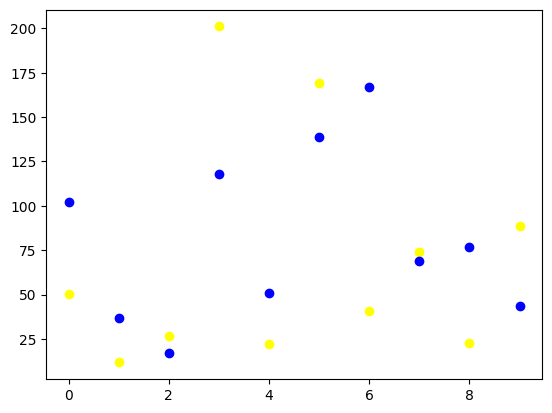

In [381]:
plt.scatter(np.arange(10), test_data[0:10, -1], color= 'yellow')
plt.scatter(np.arange(10), predictions[0:10], color= 'blue')

In [382]:
def predict(train_data, test_data):
    k = 5
    distances = calculate_euclidean_distance(train_data[:,0:-1], test_data[0:-1])
    
    indices = np.argsort(distances)
    predicted_value = np.mean(train_data[indices[0:k], -1])
    
    return predicted_value

In [383]:
df_train = pd.DataFrame(train_data)
df_test = pd.DataFrame(test_data)

In [384]:
df_train.corr()

,0,1,2
0,1.000000,-0.025912,-0.074044
1,-0.025912,1.000000,0.024977
2,-0.074044,0.024977,1.000000


In [385]:
new_train_data = train_data[:, [0,1,1]]
new_test_data = test_data[:, [0,1,1]]

In [390]:
start_time = time.process_time()

predictions = []

for i in range(len(new_test_data)):
    predicted_value = predict(new_train_data, new_test_data[i])
    predictions.append(predicted_value)  

r2_score = calculate_r2(new_test_data[:, -1], np.array(predictions))
threshold = 0.01 
number_of_errors = count_errors(new_test_data[:, -1], predictions, threshold)

end_time = time.process_time()

print("R2 Score is: ", r2_score)
print("Number of errors:", number_of_errors)
print("Time taken: ", end_time-start_time)

R2 Score is:  0.8965455803525639
Number of errors: 3950
Time taken:  2.75


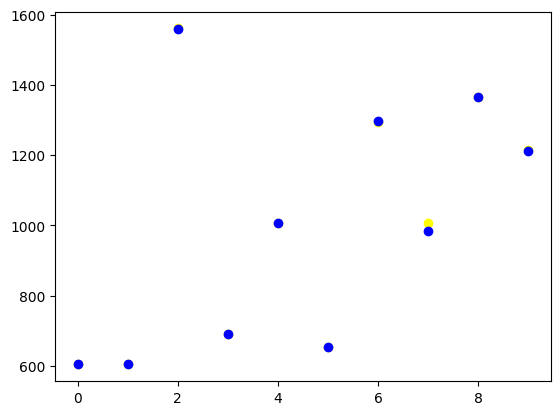

In [387]:
plt.scatter(np.arange(10), new_test_data[0:10, -1], color= 'yellow')
plt.scatter(np.arange(10), predictions[0:10], color= 'blue')

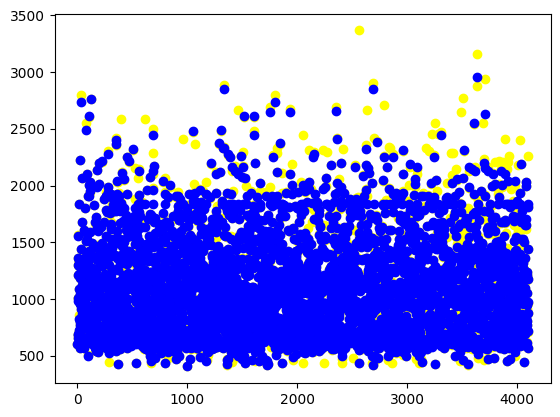

In [388]:
plt.scatter(np.arange(len(new_test_data)), new_test_data[:, -1], color= 'yellow')
plt.scatter(np.arange(len(new_test_data)), predictions, color= 'blue')